# Linear algebra Homework assignment 3 - 112006217


In [84]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Problem 1 - 4

In [85]:
# [TODO]
def compute_lookat(azim: float, elev: float):
    """
        Compute the look at vector. (Definition in Figure 3)
        azim: float, degree in [-180, 180],
        elev: float, degree in [-180, 180]
    """

    # For the definition of azim and elev, check
    # https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html

    a = m.cos(m.radians(elev)) * m.cos(m.radians(azim))
    #print(f"a: {a}")
    b =  m.cos(m.radians(elev)) * m.sin(m.radians(azim))
    lookat = np.array([a, b, m.sin(m.radians(elev))])
    #print(np.array([a, b, m.sin(m.radians(elev))]))
    return lookat

In [86]:
# [TODO]
def compute_normal(P1: tuple, P2: tuple, P3: tuple):
    """
        Compute the normal vector, given P1, P2, P3 in counter-clockwise order.
    """
    v1 = np.array(P2) - np.array(P1)
    v2 = np.array(P3) - np.array(P1)
    normal = np.cross(v1, v2)
    normal /= np.linalg.norm(normal)

    return normal

In [87]:
# [TODO]
def visible(face_normal: np.ndarray, lookat: np.ndarray):
    """
        Given a normal vector of a face, determine if the face (outward-facing side) is visible
    """
    is_visible = np.dot(face_normal, lookat) < 0 # the dot product is negative when the two vectors point in opposite directions

    return is_visible
    #return

In [96]:
'''
The command function computes also for diffusion, for experiment.
'''
'''
# [TODO] compute the beta in Figure3
def compute_intensity(face_normal: np.ndarray, lookat: np.ndarray, lightsource: np.ndarray):

  face_normal = face_normal /  np.linalg.norm(face_normal)
  lightsource = lightsource / np.linalg.norm(lightsource)
  lookat = lookat / np.linalg.norm(lookat)
  dot_intensity = np.dot(face_normal, lightsource)
  intensity = max(0, dot_intensity)

  reflect = 2 * np.dot(face_normal, lightsource) * face_normal - lightsource
  reflect = reflect / np.linalg.norm(reflect)

  set_shine = 100
  specular_intensity = max(0, np.dot(reflect, lookat)) ** set_shine
  intensity = intensity + specular_intensity

  return intensity

'''

'''
This function below focus on specular lighting doesn't compute diffusion.
'''
#[TODO]
def compute_intensity(face_normal: np.ndarray, lookat: np.ndarray, lightsource: np.ndarray):

  face_normal = face_normal / np.linalg.norm(face_normal)
  #print(f"Normalized face_normal: {face_normal}")
  lightsource = lightsource / np.linalg.norm(lightsource)
  #print(f"Normalized lightsource: {lightsource}")
  lookat = lookat / np.linalg.norm(lookat)
  reflection = 2 * np.dot(face_normal, lightsource) * face_normal - lightsource
  reflection = reflection / np.linalg.norm(reflection)

  compute_spec = np.dot(reflection, lookat)
  intensity = (compute_spec+1) / 2
  #print(f"Scaled intensity before clamping: {intensity}")
  intensity= max(intensity,0.12) ** 0.3

  return intensity

## Problem 5
Perform at least two tasks from the following list, and describe what you have done

- Change a model (please choose a convex object).
- Give each face of the model a different color. [DONE]
- Change the movemnt of the light source. [DONE]
- Other interesting changes [DONE]


In [97]:
def read_obj_file(file_path):
    vertices = []
    faces = []

    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('v '):
                vertex = list(map(float, line.strip().split()[1:]))
                vertices.append(vertex)
            elif line.startswith('f '):
                face = [int(index.split('/')[0]) for index in line.strip().split()[1:]]
                faces.append(face)

    return np.array(vertices), np.array(faces)

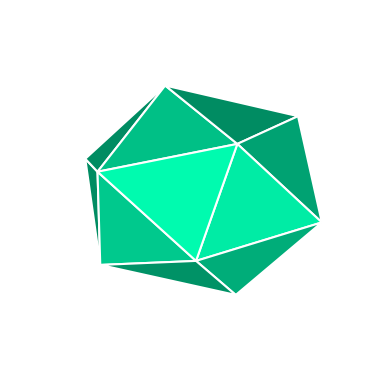

In [99]:
# Read .obj file
obj_file_path = 'icosahedron_modified.obj'
vertices, faces = read_obj_file(obj_file_path)

center = np.mean(vertices, axis=0)
vertices = vertices - center
max_x = np.max(vertices[:, 0])
min_x = np.min(vertices[:, 0])
max_y = np.max(vertices[:, 1])
min_y = np.min(vertices[:, 1])
max_z = np.max(vertices[:, 2])
min_z = np.min(vertices[:, 2])

# Plot vertices
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_axis_off()
ax.set_xlim(min_x, max_x), ax.set_ylim(min_y, max_y), ax.set_zlim(min_z, max_z)
ax.view_init(azim=60, elev=30)
lookat = compute_lookat(ax.azim, ax.elev)

'''
Description of what I have done:
Changing the base color allowed me to adjust the overall tone of the object, giving me the chance to experiment with different aesthetics,
like turquoise or yellow, to see how they affect the model’s appearance. I noticed that moving the light source had a big impact on the shading
and highlights, which are essential for understanding the 3D structure of the model. For example, a high-angle light created a dramatic top-down
effect, while a low-angle light brought out horizontal shadows. I also tried randomizing the face colors to add variety, which made it easier to distinguish
individual faces in more complex geometries. Lastly, I adjusted the minimum intensity to control the depth of shadows. Lowering it created more contrast and
brought out details that made the model’s features stand out more clearly. These changes helped me create a more visually engaging and easy-to-analyze 3D visualization.
'''

# ----- CHANGING THE COLOR OF MODEL ----
# I adjusted the object's default color to a turquoise-like shade ([0, 1, 0.7]), providing a clean and vibrant look that highlights the model's surfaces uniformly.
basecolor = np.array([0, 1, 0.7]) # DEFAULT
#basecolor = np.array([1, 1, 0.7]) # unblock to try
# basecolor = np.array([1, 1, 1])
# basecolor = np.array([2, 1, 1])
phi = 2 * np.pi
lightsource = np.array([np.cos(phi), np.sin(phi), np.sin(phi)])
lightsource = lightsource / np.linalg.norm(lightsource)

# ----- CHANGING THE MOVEMENT OF LIGHT SOURCE -----
# I set the light source to a high-angle direction ([0.3, 0.3, 0.9]), creating dynamic highlights and shadows to emphasize the model's depth and structure.
# uncomment to use different light sources:
#lightsource = lookat  # FRONT RIGHT
#lightsource = np.array([0.3, 0.3, 0.9])  # high angle light
#lightsource = np.array([1, 0.5, 0.1])  # low angle light
#lightsource = np.array([1, 1, 1])  # face normal vector aligns closely with the light source direction
#lightsource = np.array([0, 0, -1])  # light from directly below

lightsource = lightsource / np.linalg.norm(lightsource) # do not unblock this part

# ----- CHANGING THE FACES OF COLOR OF MODEL WITH RANDOM ----
# please set to False to use the base color for all faces
# You can turn off the use_random_colors flag, ensuring the entire model maintains a consistent color tone, making it easier to focus on shading and lighting effects without distraction from varied face colors.
#use_random_colors = True  # example, u can unblock this
use_random_colors = False

if vertices is None or faces is None:
  raise ValueError(">>> Failed to open obj file")

#if use_random_colors:
  #np.random.seed(42)

min_intensity = 0.55# u can adjust the min brightness for contrast of obj
# too make darker shadows lower the min_intensity to 0.35 is recommended

for face in faces:
  # Extract vertices for the current face
  face_vertices = vertices[face - 1]
  face_normal = compute_normal(*face_vertices) # computing face normal
  # normalize the face normal
  face_normal = face_normal / np.linalg.norm(face_normal)
  intensity = compute_intensity(face_normal, lookat, lightsource)
  intensity = max(min_intensity, intensity)

  if use_random_colors:
      random_color = np.random.rand(3)
      color = random_color * intensity
  else:
      color = basecolor * intensity

  color = np.clip(color, 0, 1)
  ax.add_collection3d(Poly3DCollection([face_vertices], color=color, edgecolor='w', linewidths=1.5))

# Finalize and display the plot
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

#plt.show()
# Save the figure
studentID = '112006217'  # Replace with your own student ID!
fname = f'HW3_{studentID}.png'
plt.savefig(fname)

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from PIL import Image
import os
# ----- OTHER IMPLEMENTATION -----
'''
Light Circulation Implementation

I created a script to simulate a light circulation effect on a 3D icosahedron and turn it into an animated GIF. The main goal was to show how light moves around the object,
dynamically shading its surfaces in a way that’s both smooth and visually engaging. To accomplish this, I used Python libraries like `numpy` for numerical calculations, `matplotlib`
for generating the 3D visualization, and `PIL` to compile the frames into a GIF. To handle the shading, I designed a `compute_intensity()` function. This calculates how much light each face of the icosahedron
receives based on the angle between the face’s normal vector and the direction of the light source. I added an ambient intensity (`ambient_intensity=0.6`) to make sure the faces never become completely dark,
allowing for a smoother gradient. The base color of the icosahedron was turquoise (`[0, 1, 0.7]`), and its brightness was modulated by the light intensity to create dynamic shading as the light moved.
The geometry of the icosahedron was loaded from a file (`icosahedron_modified.obj`), and I centered its vertices and faces in the 3D plot to keep it stationary. To animate the light, I set it to rotate around the
object by varying its azimuth angle over 360° in 36 steps, while keeping the elevation angle constant. This created a smooth, continuous effect as the light moved in 10° increments for each frame.
For each frame, I recalculated the light’s position and intensity and updated the shading of the icosahedron’s faces accordingly. These frames were saved as PNG files and later combined into a looping GIF using
the `PIL` library. The final output, named `HW3_112006217_OtherImplementation_LightCirculation.gif`, shows the light rotating around the icosahedron, with its faces transitioning dynamically between brighter and darker turquoise shades.
Throughout the process, I fine-tuned the `compute_intensity()` function to achieve a balance between light and shadow, ensuring the shadows weren’t too dark. Adjusting the ambient light and other
parameters helped me create a smooth gradient and a visually appealing effect. The finished project effectively demonstrates how light interacts and circulates around a 3D object’s surface.
The second block of code will be the same just in a non rotating perspective.
'''

'''
ROTATING ANGLE
'''

output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

def compute_normal(v1, v2, v3):
    edge1 = v2 - v1
    edge2 = v3 - v1
    normal = np.cross(edge1, edge2)
    return normal / np.linalg.norm(normal)

def compute_lookat(azim, elev):
    azim_rad = np.radians(azim)
    elev_rad = np.radians(elev)
    x = np.cos(azim_rad) * np.cos(elev_rad)
    y = np.sin(azim_rad) * np.cos(elev_rad)
    z = np.sin(elev_rad)
    return np.array([x, y, z])

def generate_gif(vertices, faces, basecolor, angles, gif_path):
    frame_paths = []

    for i, (azim, elev) in enumerate(angles):
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        ax.set_facecolor('white')
        fig.patch.set_facecolor('white')

        center = np.mean(vertices, axis=0)
        vertices_centered = vertices - center
        max_range = np.ptp(vertices_centered, axis=0).max()

        ax.set_xlim([-max_range, max_range])
        ax.set_ylim([-max_range, max_range])
        ax.set_zlim([-max_range, max_range])
        ax.view_init(azim=azim, elev=elev)

        lightsource = compute_lookat(azim, elev)
        lightsource = lightsource / np.linalg.norm(lightsource)

        lookat = np.array([0, 0, 1])

        for face in faces:
            face_vertices = vertices_centered[face - 1]
            face_normal = compute_normal(*face_vertices)
            intensity = compute_intensity(face_normal, lookat, lightsource)
            color = np.clip(basecolor * intensity, 0, 1)

            ax.add_collection3d(Poly3DCollection([face_vertices], color=color, edgecolor='w', linewidths=1.5))

        frame_path = os.path.join(output_dir, f"frame_{i:03d}.png")
        plt.savefig(frame_path, bbox_inches='tight')
        frame_paths.append(frame_path)
        plt.close(fig)

    frames = [Image.open(fp) for fp in frame_paths]
    frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)
    print(f"GIF saved at {gif_path}")

def read_obj_file(filepath):
    """
    load a .obj file and return vertices and faces.
    """
    vertices = []
    faces = []
    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith('v '):  # vertex definition
                parts = line.split()
                vertices.append([float(parts[1]), float(parts[2]), float(parts[3])])
            elif line.startswith('f '):  # face definition
                parts = line.split()
                faces.append([int(p.split('/')[0]) for p in parts[1:]])
    return np.array(vertices), np.array(faces)

obj_file_path = 'icosahedron_modified.obj'
vertices, faces = read_obj_file(obj_file_path)
basecolor = np.array([0, 1, 0.7])  # turquoise color
angles = [(azim, 30) for azim in np.linspace(0, 360, 36)]

gif_path = "HW3_112006217_OtherImplementation_Rotation.gif"
generate_gif(vertices, faces, basecolor, angles, gif_path)

GIF saved at HW3_112006217_OtherImplementation_Rotation.gif


In [102]:
'''
FIXED ANGLE
'''

def generate_gif(vertices, faces, basecolor, gif_path):
    frame_paths = []
    azimuth_angles = np.linspace(0, 360, 36)

    for i, azim in enumerate(azimuth_angles):
        fig = plt.figure(figsize=(6, 6))
        ax = plt.axes(projection='3d')

        ax.set_facecolor('#66c2a5')  #bg
        fig.patch.set_facecolor('#66c2a5')

        center = np.mean(vertices, axis=0)
        vertices_centered = vertices - center
        max_range = np.ptp(vertices_centered, axis=0).max()

        ax.set_xlim([-max_range, max_range])
        ax.set_ylim([-max_range, max_range])
        ax.set_zlim([-max_range, max_range])
        ax.view_init(azim=60, elev=30)  # fixed camera position

        lightsource = compute_lookat(azim, 30)
        lightsource = lightsource / np.linalg.norm(lightsource)
        lookat = np.array([0, 0, 1])

        for face in faces:
            face_vertices = vertices_centered[face - 1]
            face_normal = compute_normal(*face_vertices)
            intensity = compute_intensity(face_normal, lookat, lightsource)
            color = np.clip(basecolor * intensity, 0, 1)

            ax.add_collection3d(Poly3DCollection([face_vertices], color=color, edgecolor='w', linewidths=1.5))

        frame_path = os.path.join(output_dir, f"frame_{i:03d}.png")
        plt.savefig(frame_path, bbox_inches='tight')
        frame_paths.append(frame_path)
        plt.close(fig)

    frames = [Image.open(fp) for fp in frame_paths]
    frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)
    #print(f"GIF saved at {gif_path}")

obj_file_path = 'icosahedron_modified.obj'
vertices, faces = read_obj_file(obj_file_path)
basecolor = np.array([0, 1, 0.7])  # turquoise color

gif_path = "HW3_112006217_OtherImplementation_LightCirculation.gif"
generate_gif(vertices, faces, basecolor, gif_path)
#print(f"generated GIF saved at: {gif_path}")


## Problem 6
There is a type of terms, called **vn** (vertex normal), in the obj file.
However, it record vn as each

Please look up the definition of vertex normal and implement it accordingly. The OBJ
file with the corrected vertex normals is icosahedron modified.obj.

In [93]:
from collections import defaultdict

def load_obj(file_path):
    vertices = []
    faces = []
    vertex_normals = []

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('#'):
                continue

            values = line.split()
            if not values:
                continue

            if values[0] == 'v':
                vertices.append([float(x) for x in values[1:4]])
            elif values[0] == 'vn':
                vertex_normals.append([float(x) for x in values[1:4]])
            elif values[0] == 'f':
                vertex_indices = []
                normal_indices = []

                for vertex in values[1:]:
                    # deal with v//vn
                    if '//' in vertex:
                        v_idx, _, n_idx = vertex.split('/')
                        vertex_indices.append(int(v_idx) - 1)
                        normal_indices.append(int(n_idx) - 1)
                    # deal with v
                    else:
                        vertex_indices.append(int(vertex) - 1)

                faces.append(vertex_indices)

    return np.array(vertices), np.array(faces), np.array(vertex_normals)

In [94]:
# [TODO]
def compute_vertex_normals(vertices, faces):

    vertex_normals = np.zeros_like(vertices)
    ######## write you code below
    vertex_normals = vertices / np.linalg.norm(vertices, axis=1, keepdims=True)
    #########

    return vertex_normals

In [95]:
obj_path = "icosahedron_modified.obj"
vertices, faces, vn = load_obj(obj_path)
vertex_normals = compute_vertex_normals(vertices, faces)

print("vertex normal：")
for i, normal in enumerate(vertex_normals):
  print(f"v{i+1:02d} normal: [{normal[0]:.6f}, {normal[1]:.6f}, {normal[2]:.6f}]")

if (np.allclose(vertex_normals, vn)):
    print("PASS")
else :
    print("ERROR")

vertex normal：
v01 normal: [0.000000, -0.525731, 0.850651]
v02 normal: [0.850651, 0.000000, 0.525731]
v03 normal: [0.850651, 0.000000, -0.525731]
v04 normal: [-0.850651, 0.000000, -0.525731]
v05 normal: [-0.850651, 0.000000, 0.525731]
v06 normal: [-0.525731, 0.850651, 0.000000]
v07 normal: [0.525731, 0.850651, 0.000000]
v08 normal: [0.525731, -0.850651, 0.000000]
v09 normal: [-0.525731, -0.850651, 0.000000]
v10 normal: [0.000000, -0.525731, -0.850651]
v11 normal: [0.000000, 0.525731, -0.850651]
v12 normal: [0.000000, 0.525731, 0.850651]
PASS
